In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 3.4 Further solution concepts for normal-form games

The two solution concepts so far have been Pareto optimality and Nash equilibrium. Some other ideas are introduced here.

### 3.4.1 Maxmin and minmax strategies

The maxmin strategy is the best strategy an agent can do (max), given that whatever it is all the others will reduce the agents utility (min) as best they can. Think of it this way: The minimisation step is done GIVEN the agents action. And then the maximisation step is over the results of that. It's like the other agents get to act after knowing what you will do. Imagine I have the following matrix $A$, where the rows are my actions and the columns are my opponent's:

$
\begin{array}{c|ccc}
\text{} & \text{their action 1} & \text{their action 2} & \text{their action 3} \\
\hline
\text{my action 1} & 3 & 1 & 3 \\
\text{my action 2} & 2 & 3 & 4 \\
\end{array}
$

If I do $\max_\text{me}\min_\text{them} A$ then first they get to apply their actions given my ones, and I am left what remains:

$
\begin{array}{c|c}
\hline
\text{my action 1} & 1 \\
\text{my action 2} & 2 \\
\end{array}
$

The alternative is the maxmin strategy, which is the other way around. Essentially, I get to act first and they then get to do their worst:

$
\begin{array}{c|ccc}
\text{} & \text{their action 1} & \text{their action 2} & \text{their action 3} \\
\hline
\text{} & 3 & 3 & 4 \\
\end{array}
$

Maxmin is a lower bound on the value an agent can get in a game, and always less than or equal to Minmax. 

For an example of Maxmin, consider this game:

$
\begin{array}{c|cc}
\text{} & \text{A} & \text{B} \\
\hline
\text{A} & 3,3 & 2,2 \\
\text{B} & 0,0 & 1,1 \\
\end{array}
$

Agent 2 wants to minimise the return of agent 1, so it's easy to see they need to always go B. Agent 1's minmax strategy is then to go A always, and their maxmin value is 2.

In the battle of the sexes we can see a more complicated case:

$
\begin{array}{c|cc}
\text{} & \text{A} & \text{B} \\
\hline
\text{A} & 2,1 & 0,0 \\
\text{B} & 0,0 & 1,2 \\
\end{array}
$

If agent 1 goes A with probability $p$, then the return for agent 1 of agent 2 then going A with probability $\hat{p}$ is:

$$2p\hat{p}+0(1-p)\hat{p}+0p(1-\hat{p})+1(1-p)(1-\hat{p})$$

This can be simplified to:

$$(3p-1)\hat{p}-p+1$$

If agent 1 chooses $p$ such that $3p-1\geq 0$, then to minimise agent 2 will choose $\hat{p}=0$, which gives a score $-p+1$. In order for agent 1 to maximise this quantity (max after min) agent 1 wants $p$ as small as possible, subject to $3p-1\geq 0$, which means $p=\frac{1}{3}$.

If instead agent 1 chooses $p$ such that $3p-1\leq 0$, then to minimise agent 2 will set $\hat{p}=1$, which gives $3p-1-p+1$, which is then $2p$. Agent 1 maximises this, subject to $3p-1\leq 0$, by setting $p=\frac{1}{3}$ as well.

If $p=\frac{1}{3}$ then the score for agent 1 is $\frac{2}{3}$. This is then their maxmin.

Simple code to calculate maxmin and minmax:

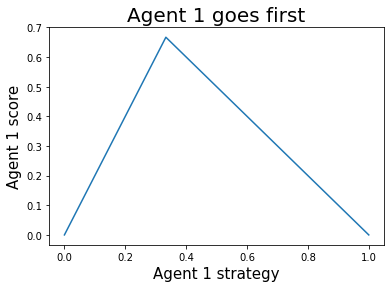

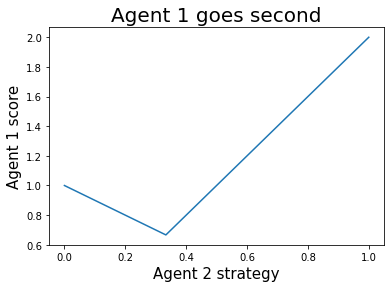

In [2]:
agent_1_options = np.linspace(0,1,100)
agent_2_options = np.linspace(0,1,100)
scores = np.zeros((len(agent_1_options),len(agent_2_options)))

for i,opt1 in enumerate(agent_1_options):
    for j,opt2 in enumerate(agent_2_options):
        scores[i,j] = 2*opt1*opt2+1*(1-opt1)*(1-opt2)

agent_1_score_by_agent_1_action_given_agent_1_goes_first = np.min(scores,axis=1)
        
plt.plot(agent_1_options,agent_1_score_by_agent_1_action_given_agent_1_goes_first)
plt.ylabel("Agent 1 score",fontsize=15)
plt.xlabel("Agent 1 strategy",fontsize=15)
plt.title("Agent 1 goes first",fontsize=20)
plt.show()

agent_1_score_by_agent_2_action_given_agent_2_goes_first = np.max(scores,axis=0)
        
plt.plot(agent_2_options,agent_1_score_by_agent_2_action_given_agent_2_goes_first)
plt.ylabel("Agent 1 score",fontsize=15)
plt.xlabel("Agent 2 strategy",fontsize=15)
plt.title("Agent 1 goes second",fontsize=20)
plt.show()

Interestingly in the above case the minmax and maxmin end up being the same. There is actually a theory about when this happens (not always in this case):

**Theorem:** In a 2 player zero-sum game at any nash equilibrium each player receives a value equal to their minmax and maxmin values.

Proof: say you are player $i$ and they are player $j$. Say in the equilibrium you have strategy $s_i$ which gives $v_i$. Obviously, if the maxmin strategy $s_\text{maxmin}$ gives a higher value $\hat{v}_i$, then this violates the assumption that $s_i$ is an equilibrium solution, as $s_\text{maxmin}$ is a lower bound.

Then let's consider if $v_i$ is less than $\hat{v}_i$. By definition, in equilibrium each player does their best move. So $v_j$ = $\max_{s_j} u_j(s_i,s_j)$. Flipping the operator gives $-v_j$ = $\min_{s_j} -u_j(s_i,s_j)$. And then, by definition of the zero sum game ($v_i = -v_j$, $u_i = u_j$) we can write: $v_i$ = $\min_{s_j}u_i (s_i,s_j)$. BUT, by definition of maxmin we have $v_i$ = $\max_{s_i}\min_{s_j}u_i (s_i,s_j)$. As maximum always increases the value this violates the 'is less than' condition.

*Note:* Minmax and Maxmin are only equal at the equilibria in a zero-sum game, not over the matrix of actions in general. E.g., consider:

$
\begin{array}{cc}
1 & 0 \\
0 & 1 \\
\end{array}
$

### 3.4.2 Minimax regret

In the real world we often have agents which want to minimise their regret, rather than minimising their risk. Regret here means missing out on something that would have been very good. Consider the table below, where the values are for agent 1 (rows) and we don't know anything about what agent 2 will do.

$
\begin{array}{cc}
100 & 1 \\
3 & 2 \\
\end{array}
$

In the above case the maxmin option is the second one, and the value is 2. But this ignores that by choosing the second option you might miss out on something great. Instead we can use regret, which is what you lose by choosing one action over another.

$
\begin{array}{cc}
0 & 1 \\
97 & 0 \\
\end{array}
$

We can then look at the maximum regret your opponent can give you:

$
\begin{array}{cc}
1 \\
97 \\
\end{array}
$

And then choose to minimise this (in this case by choosing the first action, and hoping to get the 100).

### 3.4.3 Removal of dominated strategies

A strategy for one player is strictly dominant over another (for that same player) if it always does better, no matter what other agents do. A strategy is weakly dominant if it sometimes does better, and very weakly dominant if the only guarantee is it does at least equally good. Likewise we can define dominated strategies. 

One option to build a solution set is to look at all the strategies which are not strictly dominated by others. This can be very useful for removing options from a game. For instance in:

$
\begin{array}{cc}
1 & 3 & 2 \\
2 & 3 & 5 \\
\end{array}
$

The action for the first column can be removed entirely, as it is always worse than the other two actions.

It does matter which definition of domination we use (strict / weak / very weak), as in the later cases the result depends on the order in which options are removed. 

### 3.4.4 Rationalizability

A strategy is rationalizable if it is rational to play it against another rational opponent. Of course, this means unravelling both players thoughts about what the other player would do and on and on backwards. Basically a rational strategy makes sense even if your opponent knows your thinking.